In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better readability
pd.set_option('display.max_columns', None)

Load the CSV File



In [9]:
# List of CSV file paths
file_paths = ['dataset/computed_insight_success_of_active_sellers.csv', 'dataset/summer-products-with-rating-and-performance_2020-08.csv', 'dataset/unique-categories.csv', 'dataset/unique-categories.sorted-by-count.csv']  

# Load and concatenate all CSV files
df_list = [pd.read_csv(file) for file in file_paths]
df = pd.concat(df_list, ignore_index=True)

# Display the first few rows to understand the combined data
df.head()

# Check the shape of the combined DataFrame
print("Combined DataFrame shape:", df.shape)
print("Loaded files:", file_paths)

Combined DataFrame shape: (7771, 58)
Loaded files: ['dataset/computed_insight_success_of_active_sellers.csv', 'dataset/summer-products-with-rating-and-performance_2020-08.csv', 'dataset/unique-categories.csv', 'dataset/unique-categories.sorted-by-count.csv']


Explore the Data



In [10]:
# Check basic information about the dataset
print("Dataset Info:")
df.info()

# Display summary statistics
print("\nSummary Statistics:")
df.describe()

# Check for missing values
print("\nMissing Values:")
df.isnull().sum()

# Check for duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7771 entries, 0 to 7770
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   merchantid                    958 non-null    object 
 1   listedproducts                958 non-null    float64
 2   totalunitssold                958 non-null    float64
 3   meanunitssoldperproduct       958 non-null    float64
 4   rating                        2531 non-null   float64
 5   merchantratingscount          958 non-null    float64
 6   meanproductprices             958 non-null    float64
 7   meanretailprices              958 non-null    float64
 8   averagediscount               958 non-null    float64
 9   meandiscount                  958 non-null    float64
 10  meanproductratingscount       958 non-null    float64
 11  totalurgencycount             391 non-null    float64
 12  urgencytextrate               391 non-null    fl

Clean the Data (Handle Duplicates and Missing Values)





In [11]:
# Remove duplicate rows if any
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

# Handle missing values
# For numerical columns, fill with mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# For categorical columns, fill with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify no missing values remain
print("\nMissing Values After Imputation:")
df.isnull().sum()

Shape after removing duplicates: (7737, 58)

Missing Values After Imputation:


merchantid                      0
listedproducts                  0
totalunitssold                  0
meanunitssoldperproduct         0
rating                          0
merchantratingscount            0
meanproductprices               0
meanretailprices                0
averagediscount                 0
meandiscount                    0
meanproductratingscount         0
totalurgencycount               0
urgencytextrate                 0
title                           0
title_orig                      0
price                           0
retail_price                    0
currency_buyer                  0
units_sold                      0
uses_ad_boosts                  0
rating_count                    0
rating_five_count               0
rating_four_count               0
rating_three_count              0
rating_two_count                0
rating_one_count                0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shi

Encode Categorical Variables



In [12]:
# Encode categorical variables using LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for potential inverse transformation

# Display the first few rows to check encoded data
df.head()

,merchantid,listedproducts,totalunitssold,meanunitssoldperproduct,rating,merchantratingscount,meanproductprices,meanretailprices,averagediscount,meandiscount,meanproductratingscount,totalurgencycount,urgencytextrate,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month,tag,count,keyword
0,9,2.0,120000.0,60000.0,4.219,320031.0,9.00,20.0,54.0,54.0,8836.0,1.000000,50.00000,787,412,8.356452,23.317089,0,4422.480182,0.435997,907.37232,450.738636,183.036096,137.152406,64.948529,97.57754,0.105913,0.018843,0.074074,0.012995,249,13,55,33.347628,5,2.356725,0.002599,40.450942,49.817414,1.0,0,1,527,935,437,26772.08512,4.034836,106,0.146199,117,12,12,12,0,0,0,10.44084,0
1,217,5.0,107100.0,21420.0,3.934,139223.0,7.76,34.2,61.0,61.0,4010.0,3.000000,60.00000,787,412,8.356452,23.317089,0,4422.480182,0.435997,907.37232,450.738636,183.036096,137.152406,64.948529,97.57754,0.105913,0.018843,0.074074,0.012995,249,13,55,33.347628,5,2.356725,0.002599,40.450942,49.817414,1.0,0,1,527,935,437,26772.08512,4.034836,106,0.146199,117,12,12,12,0,0,0,10.44084,0
2,36,2.0,100007.0,50004.0,4.053,108048.0,8.00,8.0,-1.0,-1.0,5531.0,1.209719,65.57289,787,412,8.356452,23.317089,0,4422.480182,0.435997,907.37232,450.738636,183.036096,137.152406,64.948529,97.57754,0.105913,0.018843,0.074074,0.012995,249,13,55,33.347628,5,2.356725,0.002599,40.450942,49.817414,1.0,0,1,527,935,437,26772.08512,4.034836,106,0.146199,117,12,12,12,0,0,0,10.44084,0
3,224,1.0,100000.0,100000.0,3.889,19248.0,5.67,19.0,71.0,71.0,18393.0,1.000000,100.00000,787,412,8.356452,23.317089,0,4422.480182,0.435997,907.37232,450.738636,183.036096,137.152406,64.948529,97.57754,0.105913,0.018843,0.074074,0.012995,249,13,55,33.347628,5,2.356725,0.002599,40.450942,49.817414,1.0,0,1,527,935,437,26772.08512,4.034836,106,0.146199,117,12,12,12,0,0,0,10.44084,0
4,6,1.0,100000.0,100000.0,4.036,366898.0,5.00,33.0,85.0,85.0,13789.0,1.209719,65.57289,787,412,8.356452,23.317089,0,4422.480182,0.435997,907.37232,450.738636,183.036096,137.152406,64.948529,97.57754,0.105913,0.018843,0.074074,0.012995,249,13,55,33.347628,5,2.356725,0.002599,40.450942,49.817414,1.0,0,1,527,935,437,26772.08512,4.034836,106,0.146199,117,12,12,12,0,0,0,10.44084,0


Scale Numerical Features



In [13]:
# Scale numerical features using StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows to check scaled data
df.head()

,merchantid,listedproducts,totalunitssold,meanunitssoldperproduct,rating,merchantratingscount,meanproductprices,meanretailprices,averagediscount,meandiscount,meanproductratingscount,totalurgencycount,urgencytextrate,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month,tag,count,keyword
0,9,0.816916,22.344423,17.243078,1.257785,10.000297,0.260330,-0.451259,1.800565,1.802423,11.684143,-1.600735e+00,-2.435778e+00,787,412,-1.011941e-15,5.257963e-16,0,4.322587e-16,0.0,0.0,1.307939e-16,0.0,-2.056250e-16,-4.234213e-16,0.0,-1.821037e-16,0.0,0.0,3.434330e-17,249,13,55,-7.500930e-16,5,0.0,0.0,0.0,0.0,0.0,0,1,527,935,437,2.060726e-16,9.796726e-15,106,1.761436e-16,117,12,12,12,0,0,0,-5.044163e-17,0
1,217,7.661860,19.790786,5.276730,0.106309,3.932949,-0.623850,0.883086,2.299164,2.301078,4.558605,1.366481e+01,-8.716637e-01,787,412,-1.011941e-15,5.257963e-16,0,4.322587e-16,0.0,0.0,1.307939e-16,0.0,-2.056250e-16,-4.234213e-16,0.0,-1.821037e-16,0.0,0.0,3.434330e-17,249,13,55,-7.500930e-16,5,0.0,0.0,0.0,0.0,0.0,0,1,527,935,437,2.060726e-16,9.796726e-15,106,1.761436e-16,117,12,12,12,0,0,0,-5.044163e-17,0
2,36,0.816916,18.386682,14.142621,0.587101,2.886814,-0.452719,-1.578875,-2.117003,-2.115581,6.804345,-1.694816e-15,-4.445480e-15,787,412,-1.011941e-15,5.257963e-16,0,4.322587e-16,0.0,0.0,1.307939e-16,0.0,-2.056250e-16,-4.234213e-16,0.0,-1.821037e-16,0.0,0.0,3.434330e-17,249,13,55,-7.500930e-16,5,0.0,0.0,0.0,0.0,0.0,0,1,527,935,437,2.060726e-16,9.796726e-15,106,1.761436e-16,117,12,12,12,0,0,0,-5.044163e-17,0
3,224,-1.464732,18.385296,29.649867,-0.075503,-0.093035,-2.114121,-0.545227,3.011449,3.013442,25.794954,-1.600735e+00,5.384794e+00,787,412,-1.011941e-15,5.257963e-16,0,4.322587e-16,0.0,0.0,1.307939e-16,0.0,-2.056250e-16,-4.234213e-16,0.0,-1.821037e-16,0.0,0.0,3.434330e-17,249,13,55,-7.500930e-16,5,0.0,0.0,0.0,0.0,0.0,0,1,527,935,437,2.060726e-16,9.796726e-15,106,1.761436e-16,117,12,12,12,0,0,0,-5.044163e-17,0
4,6,-1.464732,18.385296,29.649867,0.518416,11.573006,-2.591863,0.770324,4.008648,4.010752,18.997196,-1.694816e-15,-4.445480e-15,787,412,-1.011941e-15,5.257963e-16,0,4.322587e-16,0.0,0.0,1.307939e-16,0.0,-2.056250e-16,-4.234213e-16,0.0,-1.821037e-16,0.0,0.0,3.434330e-17,249,13,55,-7.500930e-16,5,0.0,0.0,0.0,0.0,0.0,0,1,527,935,437,2.060726e-16,9.796726e-15,106,1.761436e-16,117,12,12,12,0,0,0,-5.044163e-17,0


Check for Outliers



C:\Users\PC\AppData\Local\Temp\ipykernel_19556\1359257307.py:7: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


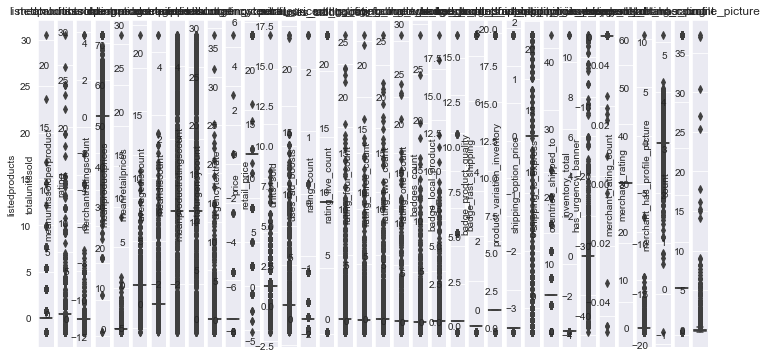

Shape after outlier removal: (5090, 58)


In [14]:
# Visualize outliers using boxplots for numerical columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Optionally remove outliers using IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Check shape after outlier removal
print("Shape after outlier removal:", df.shape)

Save the Preprocessed Data



In [15]:
# Save the preprocessed dataset to a new CSV file
df.to_csv('preprocessed_combined_dataset.csv', index=False)
print("Preprocessed data saved to 'preprocessed_combined_dataset.csv'")

Preprocessed data saved to 'preprocessed_combined_dataset.csv'
